In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings("ignore")

# EXPLORATORY DATA ANALYSIS
As features have been extracted and stored in (FinalData.csv)

In [54]:
df = pd.read_csv('FinalDataset.csv')
df.head()

,index,genre,chrom_spec,spec_centroid,spec_bandwidth,spec_rolloff,zcr,tempo,rms,mfcc1,...,mfcc41,mfcc42,mfcc43,mfcc44,mfcc45,mfcc46,mfcc47,mfcc48,mfcc49,mfcc50
0,0,blues,0.350088,1784.165850,2002.449060,3805.839606,0.083045,123.046875,0.130228,-113.570650,...,1.737207,-0.249805,-3.693819,-1.979933,-2.660221,-1.128808,0.707248,4.705580,0.645501,-2.445936
1,1,blues,0.340914,1530.176679,2039.036516,3550.522098,0.056040,107.666016,0.095948,-207.501685,...,1.132773,-1.661641,-2.498394,-2.912226,-4.111734,-2.870191,0.194629,0.953764,-2.822235,-3.975501
2,2,blues,0.363637,1552.811865,1747.702312,3042.260232,0.076291,161.499023,0.175570,-90.722595,...,3.726901,1.322144,-1.801256,-1.589433,1.614465,-1.590961,-4.517298,-3.311691,2.159647,-1.998483
3,3,blues,0.404785,1070.106615,1596.412872,2184.745799,0.033309,172.265625,0.141093,-199.544200,...,0.875079,-3.008363,-4.552734,-3.047183,-4.454864,-4.106451,-4.109830,-1.769092,-2.784498,-5.746883
4,4,blues,0.308526,1835.004266,1748.172116,3579.757627,0.101461,135.999178,0.091529,-160.337711,...,2.071163,0.596108,-2.696403,-5.808816,-6.010361,-2.101307,1.732747,2.219933,-3.609360,-3.765912


In [55]:
colormap={'blues':'black','classical':'red','country':'coral','disco':'darkcyan','hiphop':'plum','jazz':'darkgray','metal':'mediumblue','pop':'pink','reggae':'orchid','rock':'lime'}
tmp=df[['genre','chrom_spec','spec_centroid','spec_bandwidth','spec_rolloff','zcr','tempo','rms']]

# FINDING CORRELATION
Lets try reducing garbage data by removing the redundant data. Lets start by finding corelation 

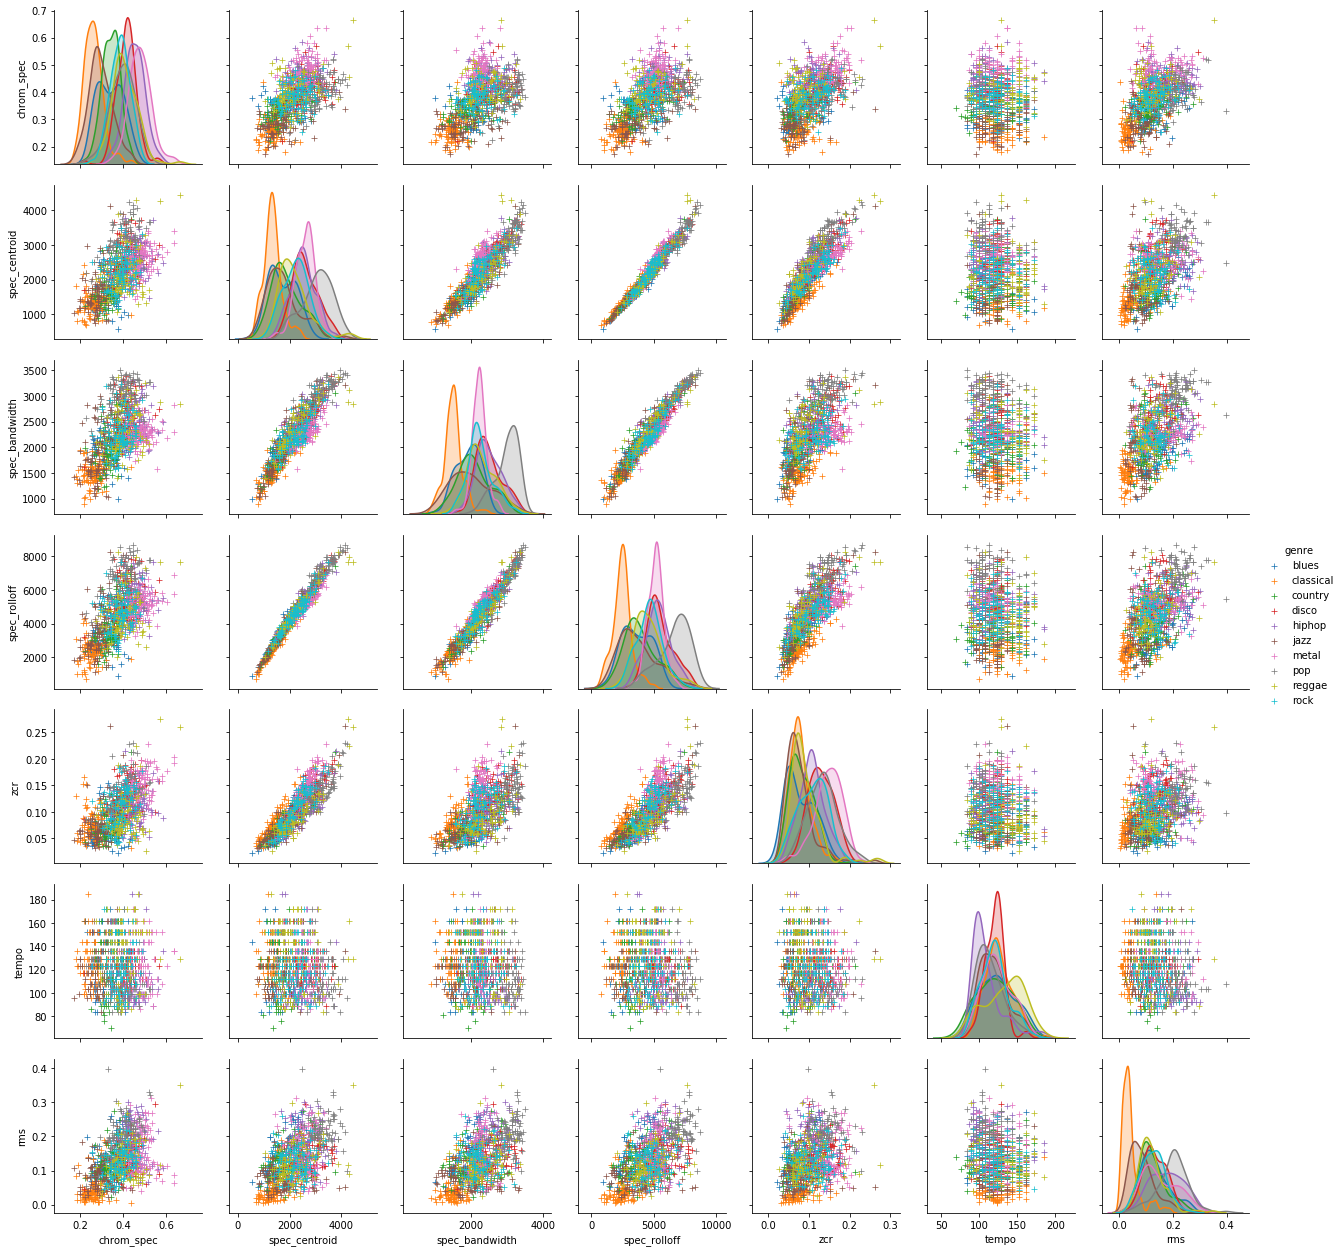

In [56]:
#correlation of features other than mfcc's
g = sns.pairplot(tmp, hue='genre', markers='+')
plt.show()

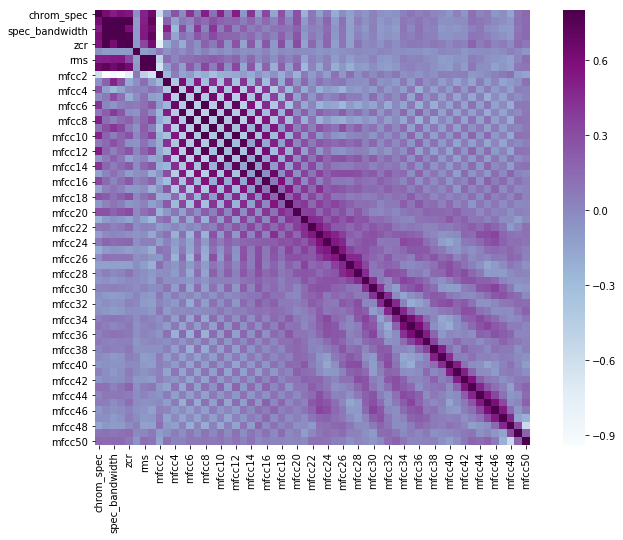

In [57]:
#correlation plot of all the features
tmp=df.drop(['index', 'genre'], axis=1)
matrix = tmp.corr()
plt.figure(figsize=(12,8)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

# correlation in features
Apart from the mfcc's, tempo is close to indpendent compared to other features. Spectral Centroid , Spectral bandwidth, spectral rolloff are comparitevely dependent

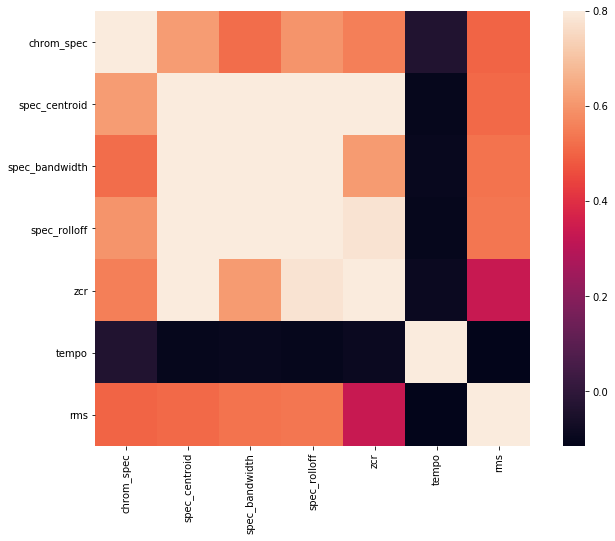

In [58]:
tmp=df[['chrom_spec','spec_centroid','spec_bandwidth','spec_rolloff','zcr','tempo','rms']]
matrix = tmp.corr()
plt.figure(figsize=(12,8)) 
sns.heatmap(matrix, vmax=.8, square=True)

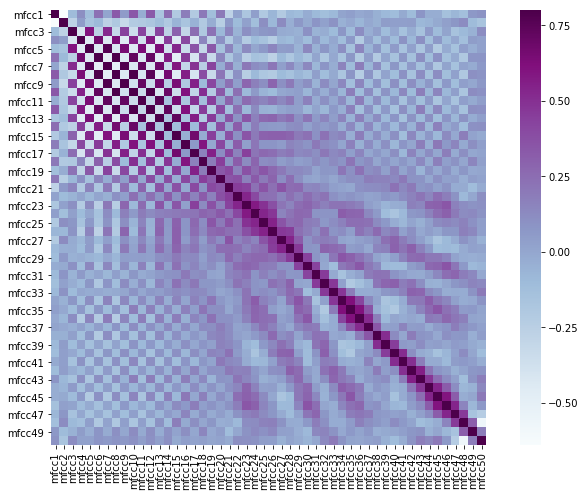

In [59]:
tmp=df.drop(['index','genre','chrom_spec','spec_centroid','spec_bandwidth','spec_rolloff','zcr','tempo','rms'], axis=1)
matrix = tmp.corr()
plt.figure(figsize=(12,8)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

# Removing some mfcc's
As we dont to feed a lot of garbage data, lets see how many mfccs should be used.This is calculated by fitting a SVM model on diffrent set of mfccs. And we will pick the one with a high test data accuracy and does'nt overfit the model. We will optimise between these two factors.

In [62]:
scoretest=[]
scoretrain=[]
for i in range(-50,-1,1):
    X = df.get_values()
    Y = X[:,1] # genres
    X = X[:,2:i] # manually varying number of mfccs to use a peak at 30 mfcc was achieved
    
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    svm = SVC(kernel='rbf')# testing various kernels
    svm.fit(X_train,Y_train)
    print(i,"Train data accuracy: ",svm.score(X_train,Y_train),"Test data accuracy: ", svm.score(X_test,Y_test))
    
    scoretest.append(svm.score(X_test,Y_test))
    scoretrain.append(svm.score(X_train,Y_train))

-50 Train data accuracy:  0.571964956195244 Test data accuracy:  0.545
-49 Train data accuracy:  0.5994993742177722 Test data accuracy:  0.575
-48 Train data accuracy:  0.5969962453066333 Test data accuracy:  0.56
-47 Train data accuracy:  0.6057571964956195 Test data accuracy:  0.56
-46 Train data accuracy:  0.6445556946182729 Test data accuracy:  0.6
-45 Train data accuracy:  0.6795994993742178 Test data accuracy:  0.615
-44 Train data accuracy:  0.6821026282853567 Test data accuracy:  0.64
-43 Train data accuracy:  0.690863579474343 Test data accuracy:  0.615
-42 Train data accuracy:  0.6921151439299124 Test data accuracy:  0.635
-41 Train data accuracy:  0.72090112640801 Test data accuracy:  0.665
-40 Train data accuracy:  0.7284105131414268 Test data accuracy:  0.69
-39 Train data accuracy:  0.7421777221526908 Test data accuracy:  0.685
-38 Train data accuracy:  0.7496871088861077 Test data accuracy:  0.695
-37 Train data accuracy:  0.7484355444305382 Test data accuracy:  0.7
-36 

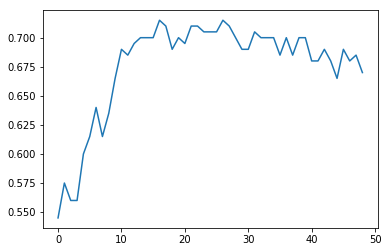

In [63]:
plt.plot(scoretest)

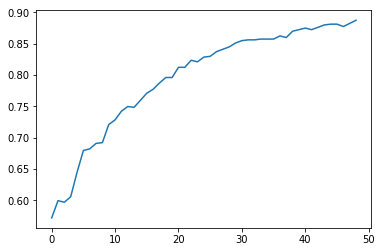

In [64]:
plt.plot(scoretrain)

# we will be considering the first 30 mfcc's for model fitting